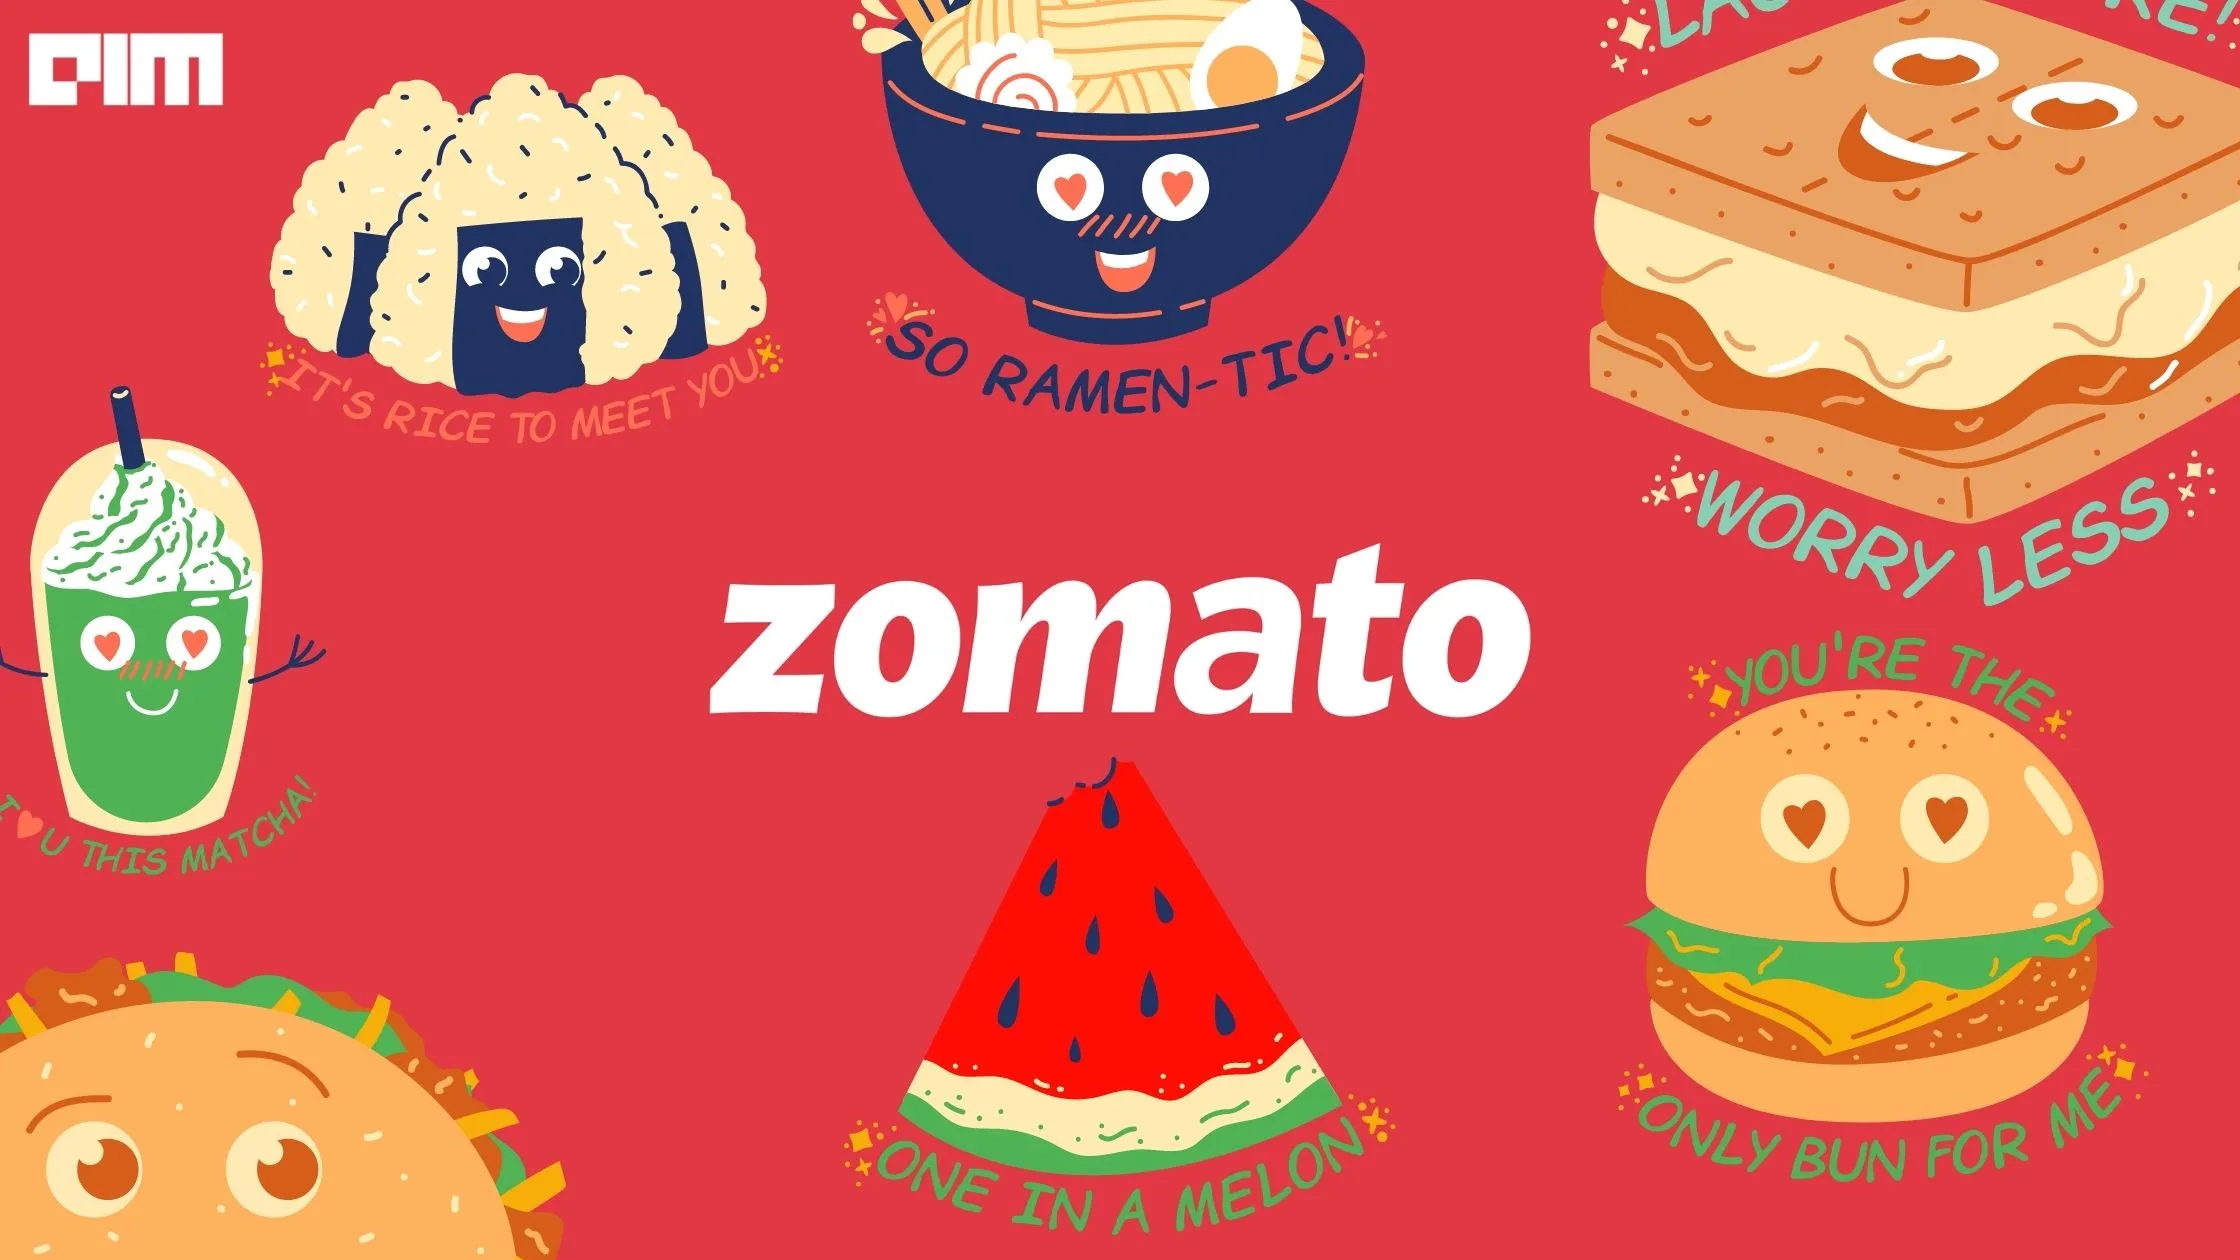

# About Dataset
Zomato is a leading global food delivery and restaurant discovery platform, founded in 2008 by Deepinder Goyal and Pankaj Chaddah. Initially launched as Foodiebay, the platform rebranded to Zomato in 2010 and rapidly expanded its services beyond restaurant discovery to include online ordering, food delivery, and restaurant reservations. Today, Zomato operates in numerous countries and serves millions of users, playing a crucial role in the food tech industry.This dataset provides an extensive record of Zomato's stock price changes since May 2021. It includes essential columns such as the date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume.



# Import Libraries

In [90]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [74]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv


# Data Loading

In [75]:
data=pd.read_csv('/kaggle/input/zomato-stock-price-dataset/Zomato Dataset.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
693,15-05-2024,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
694,16-05-2024,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
695,17-05-2024,195.149994,196.000000,193.100006,194.850006,194.850006,20841351
696,21-05-2024,194.399994,196.500000,188.750000,189.100006,189.100006,33453174


# Exploratory Data Analysis

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       698 non-null    object 
 1   Open       698 non-null    float64
 2   High       698 non-null    float64
 3   Low        698 non-null    float64
 4   Close      698 non-null    float64
 5   Adj Close  698 non-null    float64
 6   Volume     698 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 38.3+ KB


* No null values

In [77]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,698.000000,698.000000,698.000000,698.000000,698.000000,6.980000e+02
mean,98.334384,100.335100,96.009026,98.047851,98.047851,6.630727e+07
std,40.592932,41.323650,39.612367,40.518441,40.518441,7.209595e+07
min,40.849998,44.400002,40.599998,41.650002,41.650002,0.000000e+00
25%,63.062499,64.224998,62.000000,62.887498,62.887498,2.981124e+07
50%,83.599998,85.549999,82.200001,83.900002,83.900002,4.708161e+07
75%,133.637497,135.687500,131.225002,133.250004,133.250004,7.465835e+07
max,205.800003,207.199997,194.500000,201.300003,201.300003,6.948953e+08


In [91]:
data['Date']=pd.to_datetime(data['Date'])

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       698 non-null    datetime64[ns]
 1   Open       698 non-null    float64       
 2   High       698 non-null    float64       
 3   Low        698 non-null    float64       
 4   Close      698 non-null    float64       
 5   Adj Close  698 non-null    float64       
 6   Volume     698 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 38.3 KB


In [80]:
data[data.duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


* No duplicate values

In [97]:
fig = px.line(data, x="Date", y=data.columns[1:-2],title='Stock Values Over Time')
fig.show()

In [82]:
px.line(data,x='Date',y='Open',title='Open Values Over Time')

In [83]:
px.line(data,x='Date',y='High',title='High Values Over Time')

In [84]:
px.line(data,x='Date',y='Low',title='Low Values Over Time')

In [85]:
px.line(data,x='Date',y='Close',title='Closed Values Over Time')

In [86]:
px.line(data,x='Date',y='Adj Close',title='AdjClosed Values Over Time')

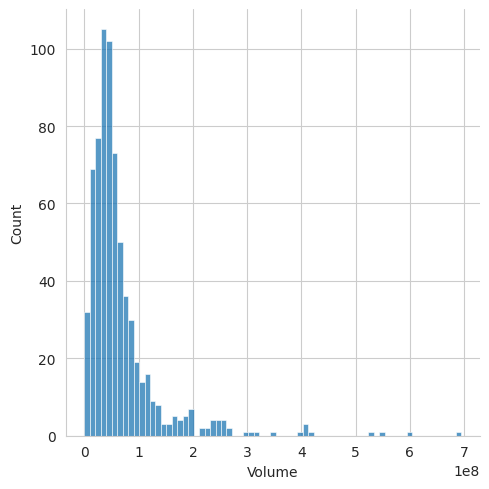

In [92]:
sns.displot(data,x=data['Volume'])
plt.title='Volume  Distribution'

In [ ]:
data.columns

# Data Modeling

In [88]:
x=data.drop(columns=['Close','Date'],axis=1)

In [40]:
y=data['Close']

In [41]:
x

,Open,High,Low,Adj Close,Volume
0,116.000000,138.899994,115.000000,126.000000,694895290
1,126.349998,143.750000,125.300003,140.649994,249723854
2,141.699997,147.800003,127.750000,132.899994,240341900
3,131.000000,135.000000,123.550003,131.199997,159793731
4,134.949997,144.000000,132.199997,141.550003,117973089
...,...,...,...,...,...
693,188.800003,193.399994,183.149994,192.000000,44772997
694,192.899994,195.850006,189.000000,195.199997,35478593
695,195.149994,196.000000,193.100006,194.850006,20841351
696,194.399994,196.500000,188.750000,189.100006,33453174


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [43]:
x_train

,Open,High,Low,Adj Close,Volume
71,130.000000,132.399994,130.000000,131.350006,4101820
392,51.250000,52.200001,50.700001,51.799999,52862406
406,53.799999,54.500000,53.299999,53.849998,39226931
313,64.099998,65.650002,63.500000,65.099998,64853360
301,68.400002,69.699997,67.500000,68.699997,87158481
...,...,...,...,...,...
359,60.650002,60.700001,59.799999,60.299999,18759536
192,69.750000,70.000000,63.900002,64.449997,43049544
629,141.000000,142.899994,139.649994,140.399994,75083259
559,105.650002,109.500000,105.550003,108.250000,59685089


In [45]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [47]:
x_train=pd.DataFrame(x_train,columns=x.columns)

In [48]:
x_train

,Open,High,Low,Adj Close,Volume
0,0.744500,0.740926,0.818393,0.783639,-0.837331
1,-1.178776,-1.183522,-1.161130,-1.158549,-0.165595
2,-1.116499,-1.128332,-1.096228,-1.108499,-0.353440
3,-0.864947,-0.860781,-0.841611,-0.833834,-0.000405
4,-0.759929,-0.763599,-0.741761,-0.745941,0.306875
...,...,...,...,...,...
483,-0.949204,-0.979559,-0.933972,-0.951024,-0.635403
484,-0.726959,-0.756400,-0.831626,-0.849704,-0.300779
485,1.013148,0.992880,1.059280,1.004591,0.140524
486,0.149811,0.191426,0.208061,0.219660,-0.071604


In [49]:
x_test=sc.transform(x_test)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [50]:
x_test

,Open,High,Low,Adj Close,Volume
0,0.597965,0.576556,0.649896,0.596866,-0.514819
1,0.898362,0.858504,0.743505,0.753121,0.105221
2,-0.850293,-0.831986,-0.884047,-0.872897,1.131356
3,1.439322,1.366011,1.224033,1.193805,-0.398333
4,-1.148248,-1.167925,-1.174860,-1.186626,0.032516
...,...,...,...,...,...
205,0.838527,0.917293,0.870814,0.930127,-0.429934
206,-1.077423,-1.094738,-1.070017,-1.069436,-0.187441
207,-1.094519,-1.113935,-1.107461,-1.114603,-0.236858
208,0.884930,0.941289,0.946949,0.987501,0.027924


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score


In [52]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsRegressor()),
    ('Support Vector Regression', SVR())
]

In [60]:
# Initialize empty lists to store results
results = []
for name, model in models:
    # Train the model
    model.fit(x_train, y_train)    
    # Make predictions on the test set
    y_pred = model.predict(x_test)
    # Evaluate the model using Mean Squared Error (MSE),R^2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Append results to the list
    results.append({'Model': name, 'MSE': mse, 'R^2 Score': r2})


# Model Evaluation

In [62]:
# Create a DataFrame from the results list
results = pd.DataFrame(results)

# Display the DataFrame
results

,Model,MSE,R^2 Score
0,Linear Regression,1.776665e-27,1.000000
1,Random Forest,6.154504e-01,0.999600
2,K-Nearest Neighbors,1.166939e+01,0.992419
3,Support Vector Regression,1.327343e+02,0.913770


In [102]:

# Plot MSE
fig = px.bar(results, x='Model', y='MSE', title='Mean Squared Error (MSE) of Each Model')
fig.show()

In [101]:
fig = px.bar(results, x='Model', y='R^2 Score', title='R^2 Score of Each Model')
fig.show()

In [105]:
# Create line plots for MSE and R^2 Score using Plotly Express
fig = px.line(results, x='Model', y='MSE', markers=True, line_shape='linear', title='Model Evaluation Line Plot')
fig.show()

fig = px.line(results, x='Model', y='R^2 Score', markers=True, line_shape='linear', title='Model Evaluation Line Plot')
fig.show()